Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes           

C:\Users\Andreea\AppData\Local\Temp\ipykernel_2000\974417465.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


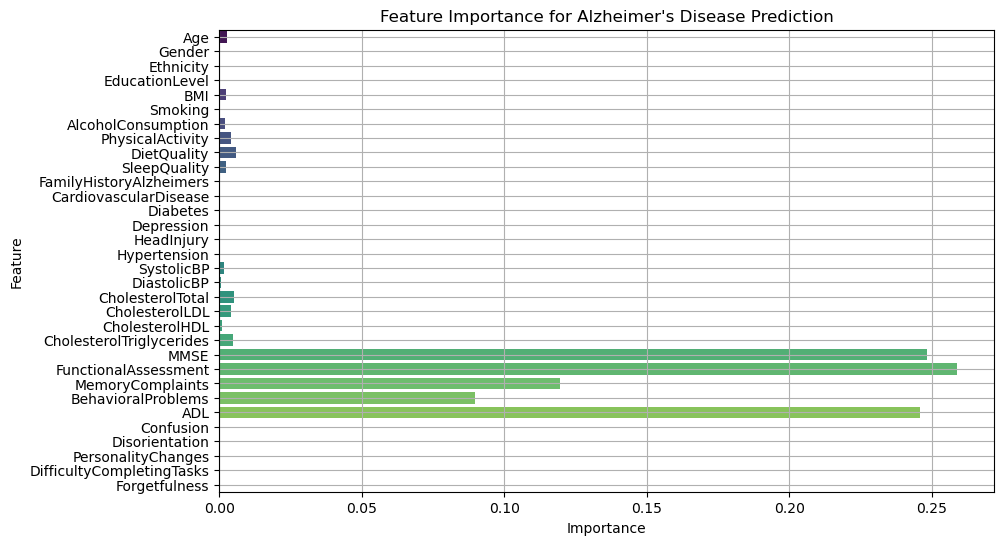

Evaluating model performance...
Model Performance:
Accuracy: 0.9581
Precision: 0.9592
Recall: 0.9216
F1-Score: 0.9400
Evaluating model with cross-validation...
Cross-validation accuracy: 0.9469 ± 0.0668


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and preprocess the dataset
def load_and_preprocess_data(filepath):
    # Load dataset
    data = pd.read_csv(filepath)
    print("Initial Dataset Information:")
    print(data.info())
    
    # Drop irrelevant or redundant columns
    data = data.drop(columns=['PatientID', 'DoctorInCharge'])  # Drop PatientID and non-predictive features
    
    # Handle missing values for numeric columns (fill with median)
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='median')
    data[numeric_cols] = imputer.fit_transform(data[numeric_cols])
    
    # Encode categorical variables
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        data[col] = LabelEncoder().fit_transform(data[col])
    
    # Scale numeric columns
    scaler = MinMaxScaler()
    data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
    
    return data

# Feature importance plot for GradientBoostingClassifier
def plot_feature_importance(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Train a GradientBoosting model
    model = GradientBoostingClassifier()
    model.fit(X, y)
    
    # Get feature importance
    feature_importances = model.feature_importances_
    
    # Plot feature importance
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=features, palette="viridis")
    plt.title("Feature Importance for Alzheimer's Disease Prediction")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.grid(True)
    plt.show()

# Evaluate the GradientBoosting model's performance (optional)
def evaluate_model_performance(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Split data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a GradientBoosting model
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
# Cross-validation with GradientBoostingClassifier (optional)
def evaluate_model_with_cross_validation(data, target_column):
    # Separate features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Cross-validation
    model = GradientBoostingClassifier()
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Main function
def main():
    # Define file path (replace with your actual path)
    filepath = "Alzheimer_datasets/alzheimers_disease_data.csv"  # Adjust path to your dataset
    data = load_and_preprocess_data(filepath)
    
    # Visualize Feature Importance
    print("Visualizing feature importance...")
    plot_feature_importance(data, target_column='Diagnosis')  # Assuming 'Diagnosis' is your target variable
    
    # Evaluate Model Performance
    print("Evaluating model performance...")
    evaluate_model_performance(data, target_column='Diagnosis')  # Assuming 'Diagnosis' is your target variable
    
    # Perform Cross-Validation
    print("Evaluating model with cross-validation...")
    evaluate_model_with_cross_validation(data, target_column='Diagnosis')

# Run the main function
if __name__ == "__main__":
    main()


In [91]:
import torch
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
from torchvision import transforms

# Defining the unique function for converting the byte dictionary into an image
def convert_dict_to_image(image_dict):
    if 'bytes' in image_dict:
        image_bytes = image_dict['bytes']
        image_array = np.frombuffer(image_bytes, dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)  # Switch to IMREAD_COLOR if necessary
        return image
    raise ValueError("Dictionary does not contain 'bytes' key")

# Class for managing the dataset
class AlzheimerDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        image_dict = self.dataframe.iloc[idx]['image']
        image = convert_dict_to_image(image_dict)
        label = int(self.dataframe.iloc[idx]['label'])
        if self.transform:
            image = self.transform(image)
        return image, label

# Transformations and loading of the dataset
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Loading and viewing the data
df_train = pd.read_parquet('Data/train.parquet')
df_test = pd.read_parquet('Data/test.parquet')
train_dataset = AlzheimerDataset(df_train, transform=transform)
test_dataset = AlzheimerDataset(df_test, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Dictionary for mapping classes to their custom labels
class_labels = {
    0: 'Mild_Demented',
    1: 'Moderate Demented',
    2: 'Non_Demented',
    3: 'Very_Mild_Demented'
}

# Defining the model
class TinyCNN(nn.Module):
    def __init__(self):
        super(TinyCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.fc = nn.Linear(16 * 64 * 64, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 64 * 64)
        x = self.fc(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TinyCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model.
for epoch in range(10):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')




Epoch 1, Loss: 1.1347241401672363
Epoch 2, Loss: 0.4432283043861389
Epoch 3, Loss: 0.1861717253923416
Epoch 4, Loss: 0.4956786334514618
Epoch 5, Loss: 0.05368353798985481
Epoch 6, Loss: 0.12873153388500214
Epoch 7, Loss: 0.04762565344572067
Epoch 8, Loss: 0.030718592926859856
Epoch 9, Loss: 0.021764516830444336
Epoch 10, Loss: 0.0206283126026392


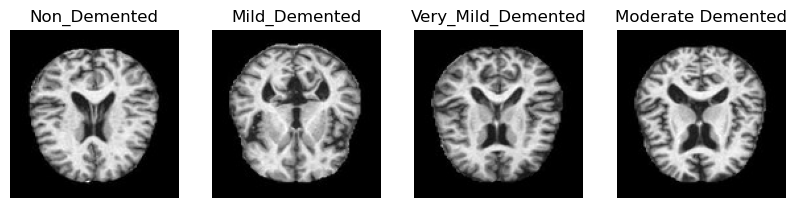

In [92]:
unique_labels = df_train['label'].unique()
sample_images = []
for label in unique_labels:
    for image, img_label in train_dataset:
        if img_label == label:
            sample_images.append((image.numpy().squeeze(), label))  # Assuming grayscale image
            break

# Visualizing one image per class
plt.figure(figsize=(10, 2.5))
for i, (image, label) in enumerate(sample_images):
    ax = plt.subplot(1, len(unique_labels), i + 1)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'{class_labels[label]}')
    ax.axis('off')
plt.show()

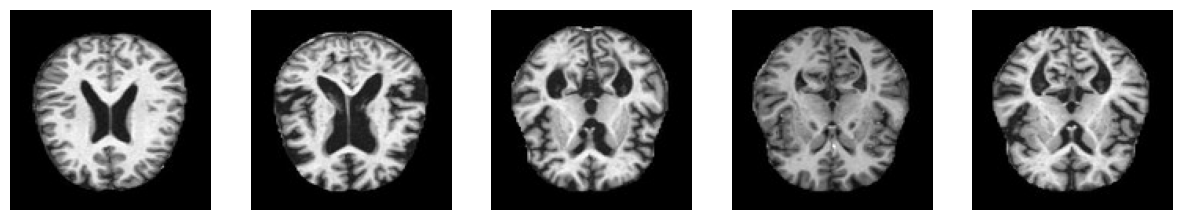

In [93]:
# Visualizing a random sample of images from the test set
sample_images = df_test['image'].apply(convert_dict_to_image).sample(5)
plt.figure(figsize=(15, 3))
for i, image in enumerate(sample_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()

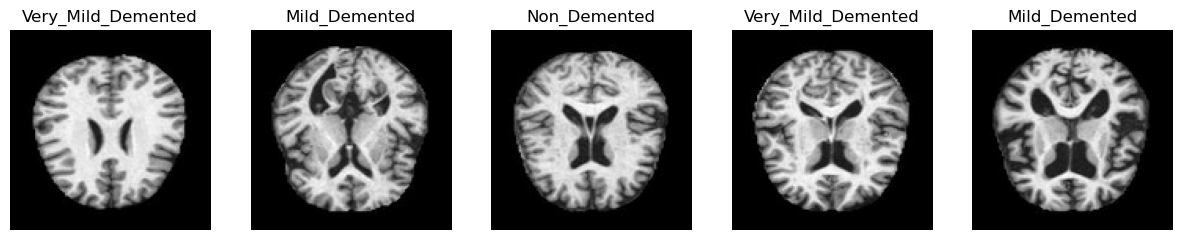

In [109]:
import matplotlib.pyplot as plt

# Assuming that predictions and sample_images are already generated by the previous code
plt.figure(figsize=(15, 3))
sample_images = [convert_dict_to_image(img) for img in df_test['image'].sample(5)]
sample_predictions = predictions[:5]  # Predictions for the selected images

for i, (image, pred) in enumerate(zip(sample_images, sample_predictions)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{class_labels.get(pred, "Unknown")}')  # Custom format with number before the label
    plt.axis('off')
plt.show()


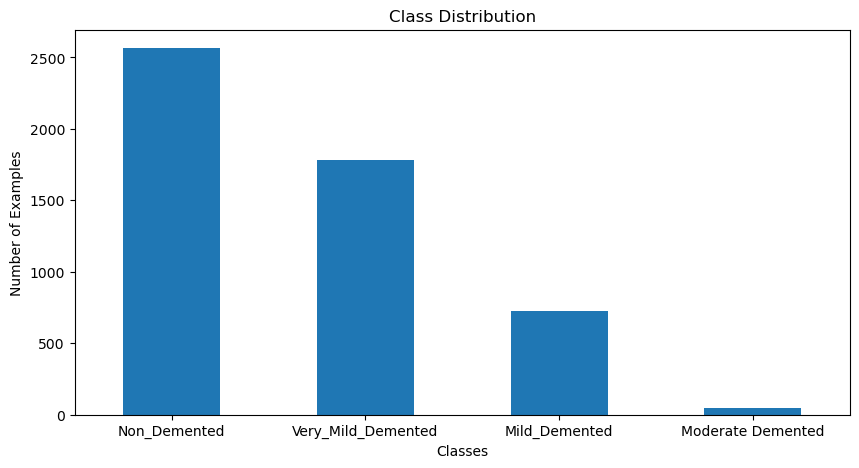

In [113]:
import matplotlib.pyplot as plt


# Calculating the class distribution
class_distribution = df_train['label'].value_counts().rename(index=class_labels)

# Visualizing the distribution
plt.figure(figsize=(10, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Examples')
plt.xticks(rotation=0)  # Ensures that the labels are shown horizontally for better readability
plt.show()


